In [39]:
import json
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

import importlib

from dredFISH.Analysis.__init__plots import *
from dredFISH.Analysis import basicu 

from dredFISH.Design.model_v1_gene_celltype import CellTypeNet
from dredFISH.Design import data_loader_scrna 
importlib.reload(data_loader_scrna)

<module 'dredFISH.Design.data_loader_scrna' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/data_loader_scrna.py'>

In [41]:
rootdat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/' #02_reduced_class_longiter/'
!ls $rootdat_dir

nrcn = 2
lr = 0.001
dat_dir = rootdat_dir + f'10-v9-l2-lag2-smrt-gene140_lmd01.00e+00_nbit70_nrcn{nrcn}_lr{lr}'
# + f'10-v5-nonoise-smrt-gene140_lmd01.00e+00_nbit70_nrcn1_lr0.1'
print(dat_dir)
print(os.path.isdir(dat_dir))

00_test_recon
01_test_recon
02-2_reduced_class_longiter
02_reduced_class
03-1_gpu
03-2_cpu
04-1_gpu
04-2_cpu
05-1_drprt0.0
05-1_drprt0.1
05-1_drprt0.2
05-1_drprt0.3
05-1_drprt0.4
05-1_drprt0.5
05-1_drprt0.6
05-1_drprt0.7
05-1_drprt0.8
05-1_drprt0.9
06-gene140
06-gene140_lmd01.00e-01
06-gene140_lmd01.00e+01
06-gene140_lmd01.00e-03
06-gene140_lmd01.00e+03
06-gene140_lmd01.00e-05
06-gene140_lmd01.00e+05
06-v3-simple-gene140_1.00e+00
06-v3-simple-gene140_1.00e-05
06-v3-simple-gene140_1.00e+05
06-v4-gene140_lmd01.00e+00
06-v4-gene140_lmd01.00e-05
06-v4-gene140_lmd01.00e+05
06-v5-gene140_lmd01.00e+05
06-v6-simple-gene140_lmd01.00e+05_nbit100
06-v6-simple-gene140_lmd01.00e+05_nbit50
06-v6-simple-gene140_lmd01.00e+05_nbit70
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr0.001
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr0.01
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr0.1
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr1
06-v7-simple-g

# outputs
- embmat - a (ncell, nbit (24)) matrix
- model - a pytorch format
- results -- some summary statistics

- meta (what are these parameters?)
    - max-half_nrml-90000.0-1.27E+05-24-0-2.60E-09-0.01-1.0
    - max-half_nrml-90000.0-1.32E+05-24-0-3.40E-09-0.01-1.0

In [42]:
!ls $dat_dir

'embmat=xxx-xxx-90000.0-xxx-70-0-xxx-xxx-xxx.json'
'model=xxx-xxx-90000.0-xxx-70-0-xxx-xxx-xxx.pt'
'result=xxx-xxx-90000.0-xxx-70-0-xxx-xxx-xxx.json'


# the results (statistics)

In [43]:
f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
print(f)

with open(f, 'r') as fh:
    res = json.load(fh)
    # res = np.array(res)
    # print(res.shape)
list(res.keys())
list(res['1'].keys())

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/10-v9-l2-lag2-smrt-gene140_lmd01.00e+00_nbit70_nrcn2_lr0.001/result=xxx-xxx-90000.0-xxx-70-0-xxx-xxx-xxx.json


['0', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']

In [44]:
_x = []
_y1 = []
_y2 = []
_y3 = []
_y4 = []

_y5 = []
_y6 = []

_y7 = []
_y8 = []

_y9 = []
_y10 = []
for _iter in res.keys():
    _x.append(_iter)
#     _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
#     _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
    # _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
    _y3.append(res[_iter]['0']['fine_acc'])
#     _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
    
#     _y5.append(res[_iter]['dsc_lss'])
#     _y6.append(res[_iter]['row_cnst'])
    
    # _y7.append(np.mean([val for key, val in res[_iter]['smrt_mrgn_lss'].items()]))
    # _y8.append(np.mean([val for key, val in res[_iter]['tenx_mrgn_lss'].items()]))
    
    _y9.append(res[_iter]['0']['rcn_lss'])
    # _y10.append(np.mean([val for key, val in res[_iter]['tenx_rcn_lss'].items()]))

_x = np.array(_x).astype(int)

In [45]:
# fig, ax = plt.subplots()
# ax.plot(_x, _y1, '-o', color='k', label='SMART-seq L3')
# ax.plot(_x, _y2, '-o', color='C1', label='10X L3' )
# ax.plot(_x, _y3, '-s', color='k', label='SMART-seq L5')
# ax.plot(_x, _y4, '-s', color='C1', label='10X L5' )
# ax.set_xlabel('Iteration')
# ax.set_ylabel('Classification accuracy\n(validation set)')
# ax.legend(bbox_to_anchor=(1,1))
# sns.despine(ax=ax)
# # powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
# plt.show()

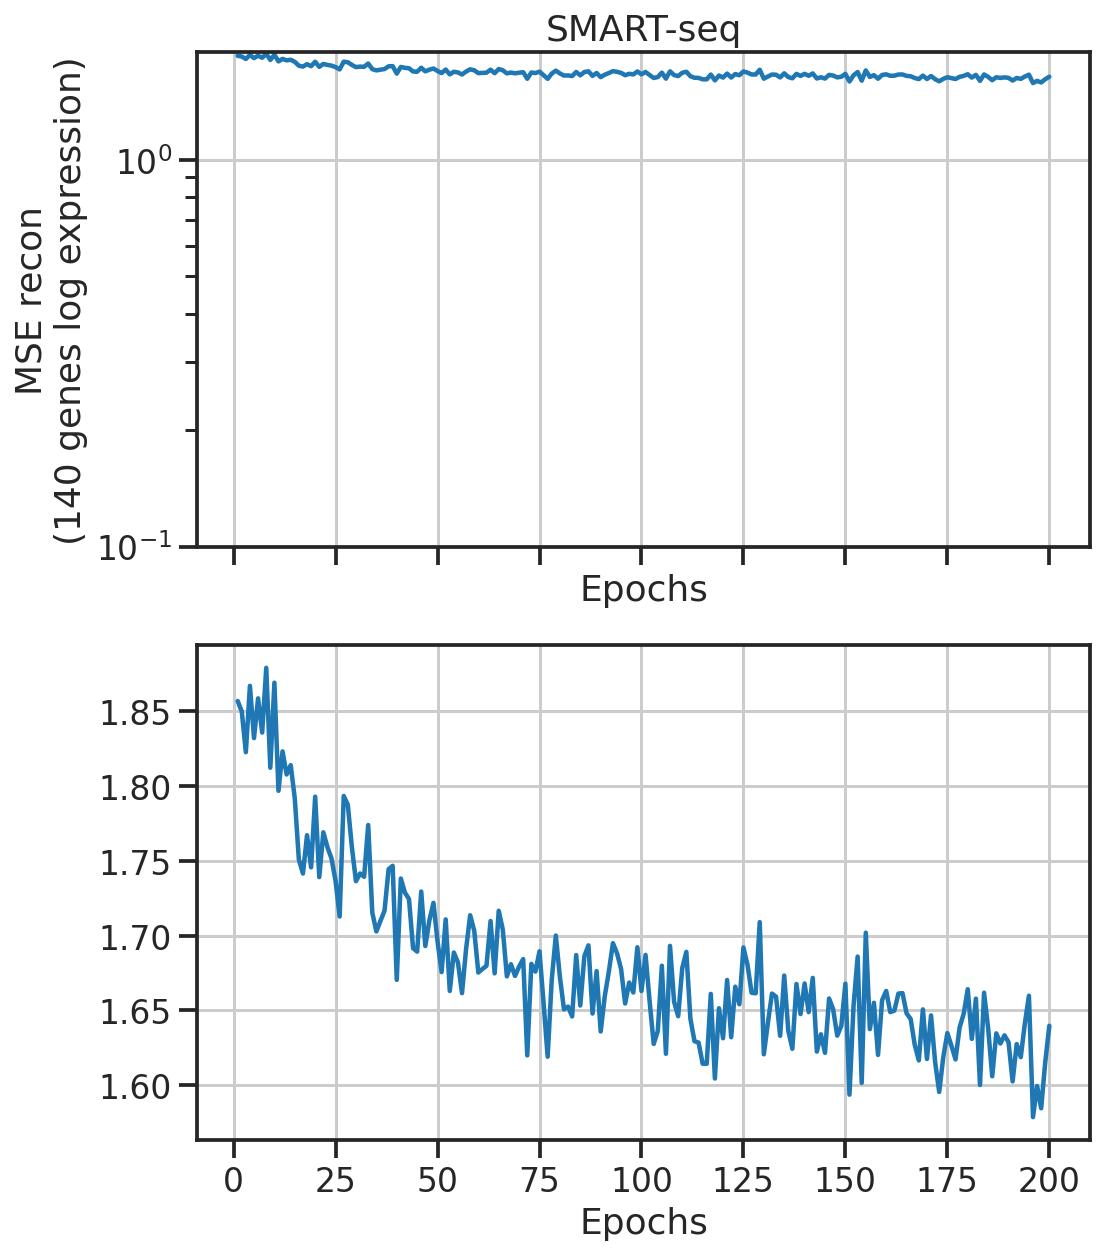

In [46]:
fig, axs = plt.subplots(2,1,figsize=(1*8,2*5), sharex=True)
ax = axs[0]
ax.plot(_x, _y9, '-')
ax.set_title('SMART-seq')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE recon\n(140 genes log expression)')
ax.set_yscale('log')
ax.set_ylim(ymin=1e-1)

ax = axs[1]
ax.plot(_x, _y9, '-')
# ax.set_title('SMART-seq')
ax.set_xlabel('Epochs')
# ax.set_ylabel('MSE recon\n(140 genes log expression)')
# ax.set_yscale('log')
# ax.set_ylim(ymin=1e-1)
# ax.set_ylim([0,2])
# ax.set_xlim([0,300])

plt.show()


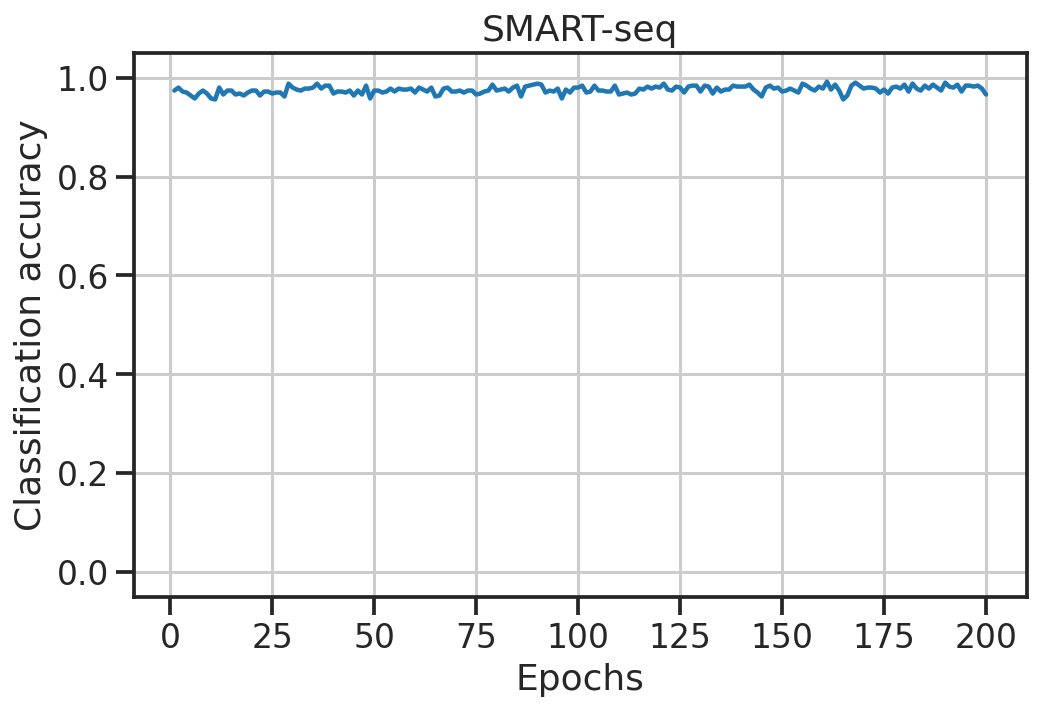

In [47]:

fig, ax = plt.subplots(1,1,figsize=(1*8,1*5))
# ax = axs[0]
ax.plot(_x, _y3, '-')
ax.set_title('SMART-seq')
ax.set_xlabel('Epochs')
ax.set_ylabel('Classification accuracy')
ax.set_ylim([-0.05,1.05])


# ax = axs[1]
# ax.plot(_x, _y10, '-')
# ax.set_title('10x')

plt.show()

## Calculate R2 per gene 
- on any data
- on validation data only

In [48]:
def get_mse_torch(tnsr_true, tnsr_pred=[]):
    """Mean (over rows) squared error
    if no pred, returns the variance.
    """
    if len(tnsr_pred):
        mse = (tnsr_true - tnsr_pred).square().mean(axis=0)
    else:
        mse = (tnsr_true - tnsr_true.mean(axis=0)).square().mean(axis=0)
    return mse
        
def get_r2_torch(tnsr_true, tnsr_pred, zero_tol=1e-10):
    """
    """
    mse = get_mse_torch(tnsr_true, tnsr_pred)
    var = get_mse_torch(tnsr_true)
    r2 = 1-mse/torch.clamp(var, min=zero_tol)
    return r2

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [49]:
# prep the model
f = glob.glob(os.path.join(dat_dir, 'model*'))[0]
print(f)

reduction, cnst, mxpr, min_pos, n_bit, drprt, lmd1, lmd2, lmd3 = (os.path.basename(f)
                                                                        [len('model='):-len('.pt')]
                                                                        .replace('E-', 'expn').split('-')
                                                                 )
lmd0 = 1
mxpr = np.float64(mxpr)
# min_pos = np.float64(min_pos)
n_bit = int(n_bit)
drprt = np.float64(drprt)
# lmd1 = np.float64(lmd1.replace('expn', 'E-'))
# lmd2 = np.float64(lmd2)
# lmd3 = np.float64(lmd3)
reduction, cnst, mxpr, min_pos, n_bit, drprt, lmd1, lmd2, lmd3

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/10-v9-l2-lag2-smrt-gene140_lmd01.00e+00_nbit70_nrcn2_lr0.001/model=xxx-xxx-90000.0-xxx-70-0-xxx-xxx-xxx.pt


('xxx', 'xxx', 90000.0, 'xxx', 70, 0.0, 'xxx', 'xxx', 'xxx')

In [50]:
# test
trn_dataloader = data_loader_scrna.load_Allen_data(
    datasetkey='smrt_trn', 
    keyX='counts', keyY='l3_code', keyYcat='l3_cat', 
    batch_size=64,
)
tst_dataloader = data_loader_scrna.load_Allen_data(
    datasetkey='smrt_tst', 
    keyX='counts', keyY='l3_code', keyYcat='l3_cat', 
    batch_size=500,
)
gsubidx = torch.load(
    os.path.join('/bigstore/GeneralStorage/fangming/projects/dredfish/data/', 'rna', 'gidx_sub140_smrt_v1.pt')
)

n_gns = trn_dataloader.dataset.X.shape[1] # number of genes
n_cat = len(trn_dataloader.dataset.Ycat) # number of clusters
cnstrnts = torch.tensor(trn_dataloader.dataset.data['num_probe_limit'])
n_rcn_layers = nrcn

model= CellTypeNet(n_gns=     n_gns,                      
                   n_cat=     n_cat,                      
                   gsubidx= gsubidx,
                   n_rcn_layers=n_rcn_layers,
                   n_bit=     n_bit,                      # fixed
                   mxpr=      mxpr,
                   drprt=     0,
                   lmd0=      lmd0,
                  )
model.load_state_dict(torch.load(f, map_location=device))
# model.eval()

<All keys matched successfully>

In [51]:
model.eval()

# evaluate
i = 0
with torch.no_grad():
    # validation dataset
    smrt_ftrs, smrt_clsts = next(iter(tst_dataloader))
    smrt_ftrs= smrt_ftrs.float().to(device)
    smrt_ftrs_gsub= (smrt_ftrs[:,gsubidx]+1).log() # log(x+1) norm

    smrt_fine, smrt_ftrs_rcn, smrt_emb, = model.forward(smrt_ftrs, rnd=True)
    # smrt_rcn_lss = (smrt_ftrs_rcn - smrt_ftrs_gsub).square().mean()
    smrt_rcn_lss = nn.MSELoss()(smrt_ftrs_rcn, smrt_ftrs_gsub)

    smrt_r2 = get_r2_torch(smrt_ftrs_gsub, smrt_ftrs_rcn)

In [52]:
smrt_rcn_lss

tensor(1.6913)

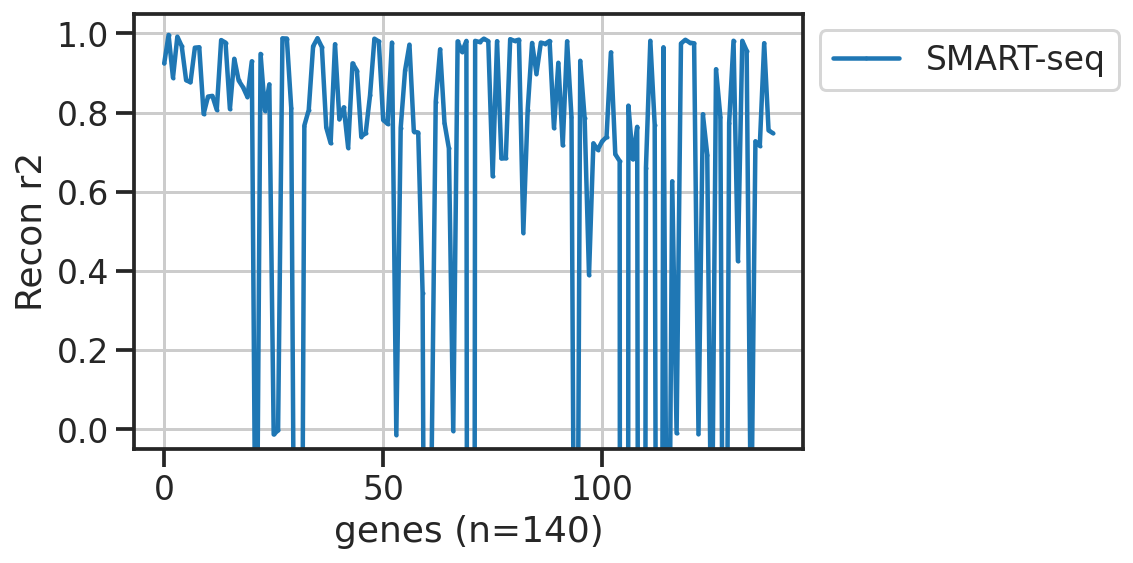

In [53]:
fig, ax = plt.subplots()
# ax.plot(tenx_r2, label='10X')
ax.plot(smrt_r2, '-o', label='SMART-seq', markersize=1)
ax.set_ylim([-0.05,1.05])
ax.set_ylabel('Recon r2')
ax.set_xlabel(f'genes (n={len(smrt_r2)})')
ax.legend(bbox_to_anchor=(1,1))
plt.show()

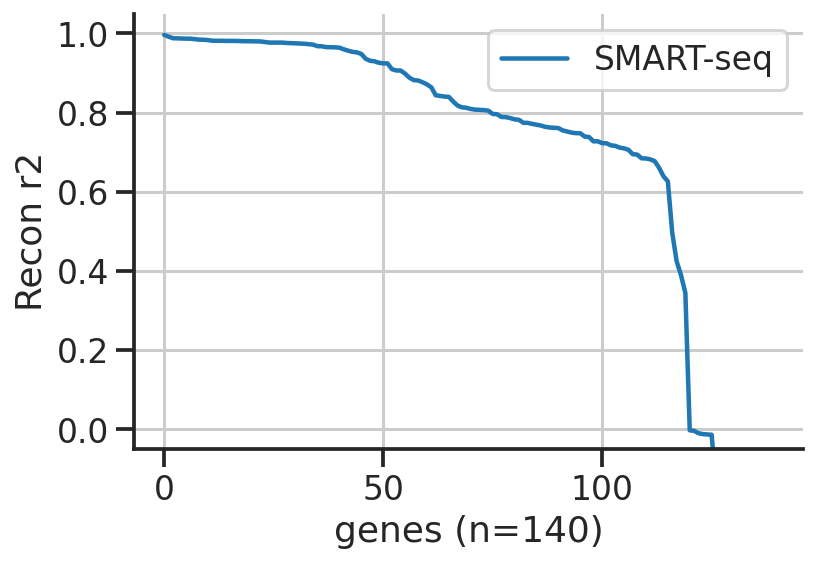

In [54]:
fig, ax = plt.subplots()
# ax.plot(np.sort(tenx_r2)[::-1], label='10X')
ax.plot(np.sort(smrt_r2)[::-1], '-', label='SMART-seq',)
ax.set_ylim([-0.05,1.05])
ax.set_ylabel('Recon r2')
ax.set_xlabel(f'genes (n={len(smrt_r2)})')
ax.legend()
sns.despine(ax=ax)
plt.show()

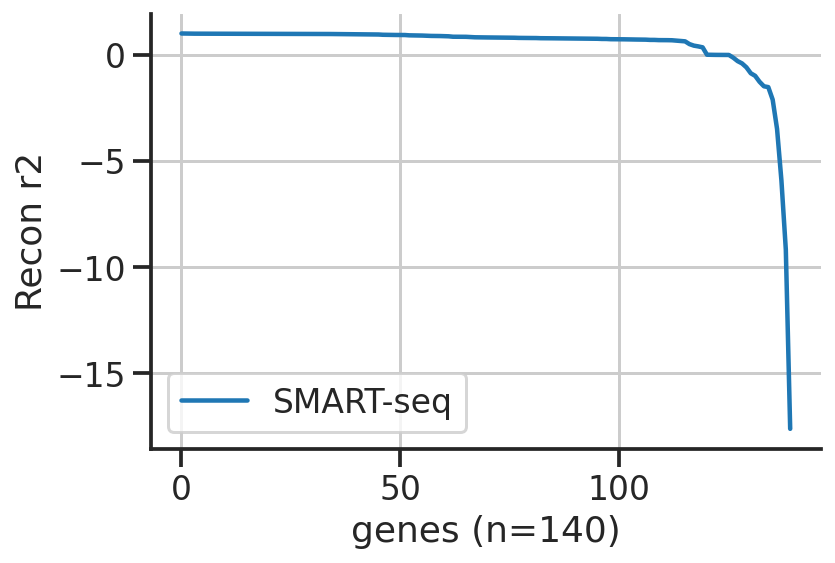

In [55]:
fig, ax = plt.subplots()
# ax.plot(np.sort(tenx_r2)[::-1], label='10X')
ax.plot(np.sort(smrt_r2)[::-1], '-', label='SMART-seq',)
# ax.set_ylim([-0.05,1.05])
ax.set_ylabel('Recon r2')
ax.set_xlabel(f'genes (n={len(smrt_r2)})')
ax.legend()
sns.despine(ax=ax)
plt.show()